In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


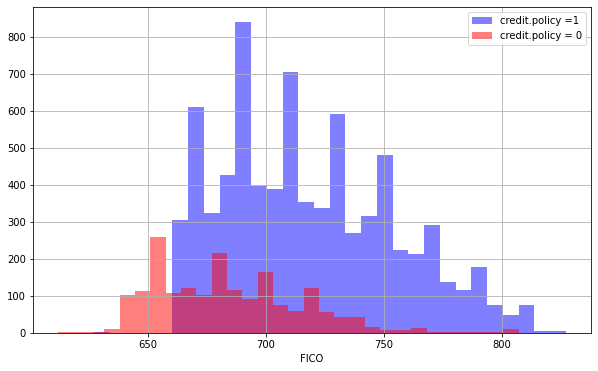

In [11]:
# Create a histogram of two FICO distributions on top of each other, one for each “credit. policy ”outcome.

plt.figure(figsize=(10,6))
loans[loans['credit.policy'] == 1]['fico'].hist(alpha = 0.5,color = 'blue', bins = 30,label = 'credit.policy =1 ')
loans[loans['credit.policy'] == 0]['fico'].hist(alpha = 0.5,color = 'red', bins = 30,label = 'credit.policy = 0')
plt.legend()
plt.xlabel('FICO');

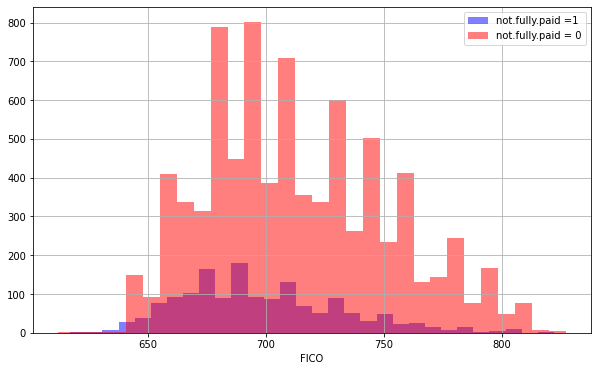

In [25]:
# Creating a similar figure, except this time we are selecting by the “not.fully.paid” column.

plt.figure(figsize=(10,6))
loans[loans['not.fully.paid'] == 1]['fico'].hist(alpha = 0.5,color = 'blue', bins = 30,label = 'not.fully.paid =1 ')
loans[loans['not.fully.paid'] == 0]['fico'].hist(alpha = 0.5,color = 'red', bins = 30,label = 'not.fully.paid = 0')
plt.legend()
plt.xlabel('FICO');

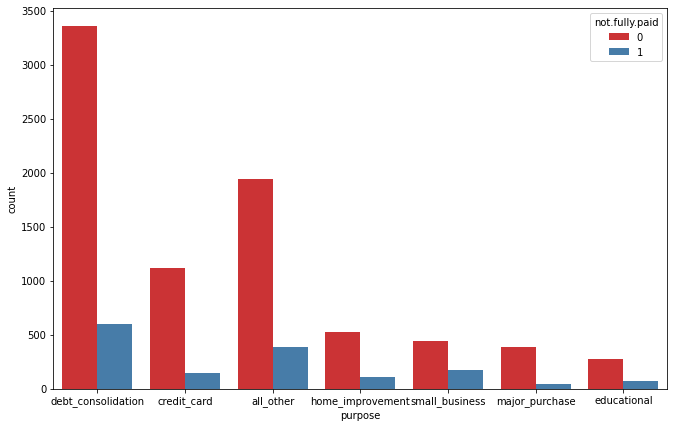

In [24]:
# Creating a countplot using seaborn showing the counts of loans by ‘purpose’, with the color hue defined by “not.fully.paid”


plt.figure(figsize=(11,7))
sns.countplot(x = 'purpose',hue='not.fully.paid',data = loans,palette = 'Set1');

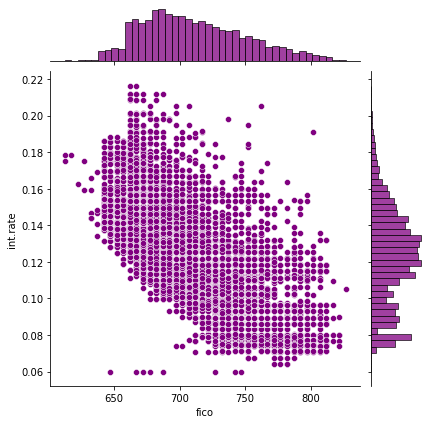

In [27]:
# The trend between ‘FICO score’ and ‘interest rate’. (using jointplot)

sns.jointplot(x = 'fico',y = 'int.rate',data = loans,color = 'purple');

<Figure size 792x504 with 0 Axes>

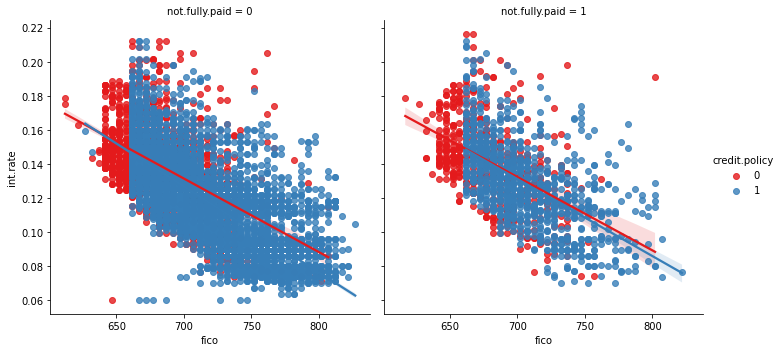

In [33]:
# Creating the following lmplots to see if the trend differed between not.fully.paid and “credit.policy”.

plt.figure(figsize = (11,7))
sns.lmplot(y = 'int.rate',x = 'fico',data = loans , hue = 'credit.policy',
          col = 'not.fully.paid', palette = 'Set1');

In [34]:
# Setting up the Data | Categorical Features
# transform purpose column using dummy variables so sklearn will be able to understand them.
# use pd.get_dummies for do it one step

cat_feats = ['purpose']
final_data = pd.get_dummies(loans,columns= cat_feats,drop_first = 'True')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [36]:
#  Train Test Split

from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid',axis = 1)
y = final_data['not.fully.paid']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state  = 101)

In [37]:
# Let's train a single decision tree first :

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report ,confusion_matrix 

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [39]:
print(confusion_matrix(y_test,predictions))

[[1991  440]
 [ 341  102]]


In [40]:
# Creating an instance of the RandomForestClassifier class and fit it into our training data from the previous step.

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [41]:
predictions = rfc.predict(X_test)

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.59      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [43]:
print(confusion_matrix(y_test,predictions))

[[2424    7]
 [ 433   10]]
